<a href="https://colab.research.google.com/github/lilacs2039/ColabNotebooks/blob/master/plots/sns%E3%81%A8Pandas%E6%8F%8F%E7%94%BB%E7%94%A8%E9%96%A2%E6%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自分用プロット関数
Pandas Plot解説記事
https://qiita.com/hik0107/items/de5785f680096df93efa#%E5%90%84%E7%A8%AE%E3%81%AE%E3%83%81%E3%83%A3%E3%83%BC%E3%83%88%E3%81%AE%E7%B4%B9%E4%BB%8B


In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# --------------  グラフサイズ設定パラメータ  -----------------------
size_inch, size_px = 15, 2000  #15, 2000が基本。(15,800)も可能（保存したグラフは見切れる）　　colabは、グラフの横幅[px]が画面の横幅[px]を超えると縮小表示、満たないときはそのままグラフ表示する。

# 横幅（インチ）を指定したときに、指定pxとなるようなDPIを計算。
# Jupyter表示時はインチ単位指定だが、ファイル保存時はpx単位になるため。
_h_inch = size_inch * 9/16
_dpi = int(size_px / size_inch)
_fontsize = size_inch * 2  # 15インチ・2kpxなら30px, 5インチ・2kpxなら10px　でちょうどよかった。
# グラフのデフォルト設定。 ↑と同一セルだと初期化がうまくいかなかった。
sns.set_style(style="whitegrid")
plt.rcParams.update({
  'font.size' : _fontsize
  # ,'font.family' : 'Meiryo' if os.name == 'nt' else 'Osaka'   # Colabでは日本語フォントがインストールされてない
  ,'figure.figsize' : [size_inch, _h_inch]  #[20.0, 10.0]
  ,'figure.dpi' : _dpi  #300
  ,'savefig.dpi' : _dpi
  ,'figure.titlesize' : 'large'
  ,'legend.fontsize' : 'small'
  ,'axes.labelsize' : 'medium'
  ,'xtick.labelsize' : 'small'
  ,'ytick.labelsize' : 'small'
  })


In [0]:
df = pd.read_csv("sample_data/california_housing_train.csv")[0:1000]

In [4]:
df['cat'] = pd.cut(df.housing_median_age, bins=[0,20,30,40,100], labels="A,B,C,D".split(','))
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cat
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,A
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,A
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,A
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,A
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,A


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-116.709970,33.178530,20.825000,3212.465000,651.963000,1579.355000,558.029000,3.422499,143689.602000
std,0.572927,0.603853,9.301123,2634.557551,536.881431,1167.885867,431.297776,1.537552,72594.233447
min,-117.100000,32.540000,2.000000,42.000000,10.000000,9.000000,3.000000,0.499900,14999.000000
25%,-117.060000,32.747500,15.000000,1593.500000,317.000000,816.000000,283.750000,2.264525,93200.000000
50%,-116.990000,32.850000,19.000000,2523.000000,511.000000,1305.500000,452.500000,3.132150,134050.000000
75%,-116.520000,33.710000,28.000000,3912.750000,788.250000,1997.750000,691.750000,4.221325,170850.000000
max,-114.310000,36.400000,52.000000,19107.000000,3923.000000,7985.000000,3232.000000,10.618600,500001.000000


In [6]:
df.describe(exclude='number')

,cat
count,1000
unique,4
top,A
freq,556


In [0]:
save_dir = "./04_output/plots/"  # プロットの自動保存ディレクトリ
def plot(ax_grid, tl=None, xl=None, yl=None, xtl=None, savename=None, xlim=None, ylim=None, ld_out=False):
  """
  パワーポイント用のグラフの生成


  Note:figsizeとtitleのy位置について
    figsizeの指定の仕方によってtitle位置の設定のされ方が違う
    figsizeをsns.jointplot(height=15)のように指定するなら、「, y=1.02」を追加
      seabornはfigsize指定がpltとは別になっているのでheightパラメータを使う。　https://qiita.com/nj_ryoo0/items/9105ddfdf1b08b58398e
  """
  fig=None
  if isinstance(ax_grid, plt.Axes):
    # seabornのAxesレベル関数か、pyplotで生成したグラフの場合
    ax = ax_grid
    fig = ax.figure
    if xlim is not None : ax.set_xlim(xlim[0], xlim[1])  #plot()のとき　bottom,top  histのときleft,right
    if ylim is not None : ax.set_ylim(ylim[0], ylim[1])  #plot()のとき　bottom,top  histのときleft,right
    if tl is not None : ax.set_title(tl)
    if xl is not None : ax.set_xlabel(xl)
    if yl is not None : ax.set_ylabel(yl)
    if xtl is not None : ax.set(xtickLabels = xtl)
    if ld_out : ax.legend(loc="upper left", bbox_to_anchor=(1,1))  # 凡例をグラフ枠の外側へ配置
  elif isinstance(ax_grid,  (sns.FacetGrid, sns.PairGrid, sns.JointGrid, sns.pairplot, sns.jointplot)):
    # seaborn のfigureレベル関数で生成したグラフの場合
    g = ax_grid
    fig = g.fig
    # g.fig.set_figheight(size_inch);  g.fig.set_figwidth(size_inch)  # figsizeの修正。あとから修正すると余白やタイトル位置が変になるので、面倒だがグラフ生成のたびにheightで指定することにした。
    if tl is not None : 
      # タイトルを追加するときは、そのまま追加するとファイル保存したときにタイトルが見切れるので、
      # グラフを縦に90%に縮めてタイトルを設置
      g.fig.subplots_adjust(top=0.9)
      g.fig.suptitle(tl)  #, y=1.02
  # save figure
  p = Path(save_dir); p.mkdir(parents=True, exist_ok=True)
  if savename is not None : fig.savefig((p/f"{savename}.png").resolve())
  elif tl is not None : fig.savefig((p/f"{tl}.png").resolve())



# seabornグラフ

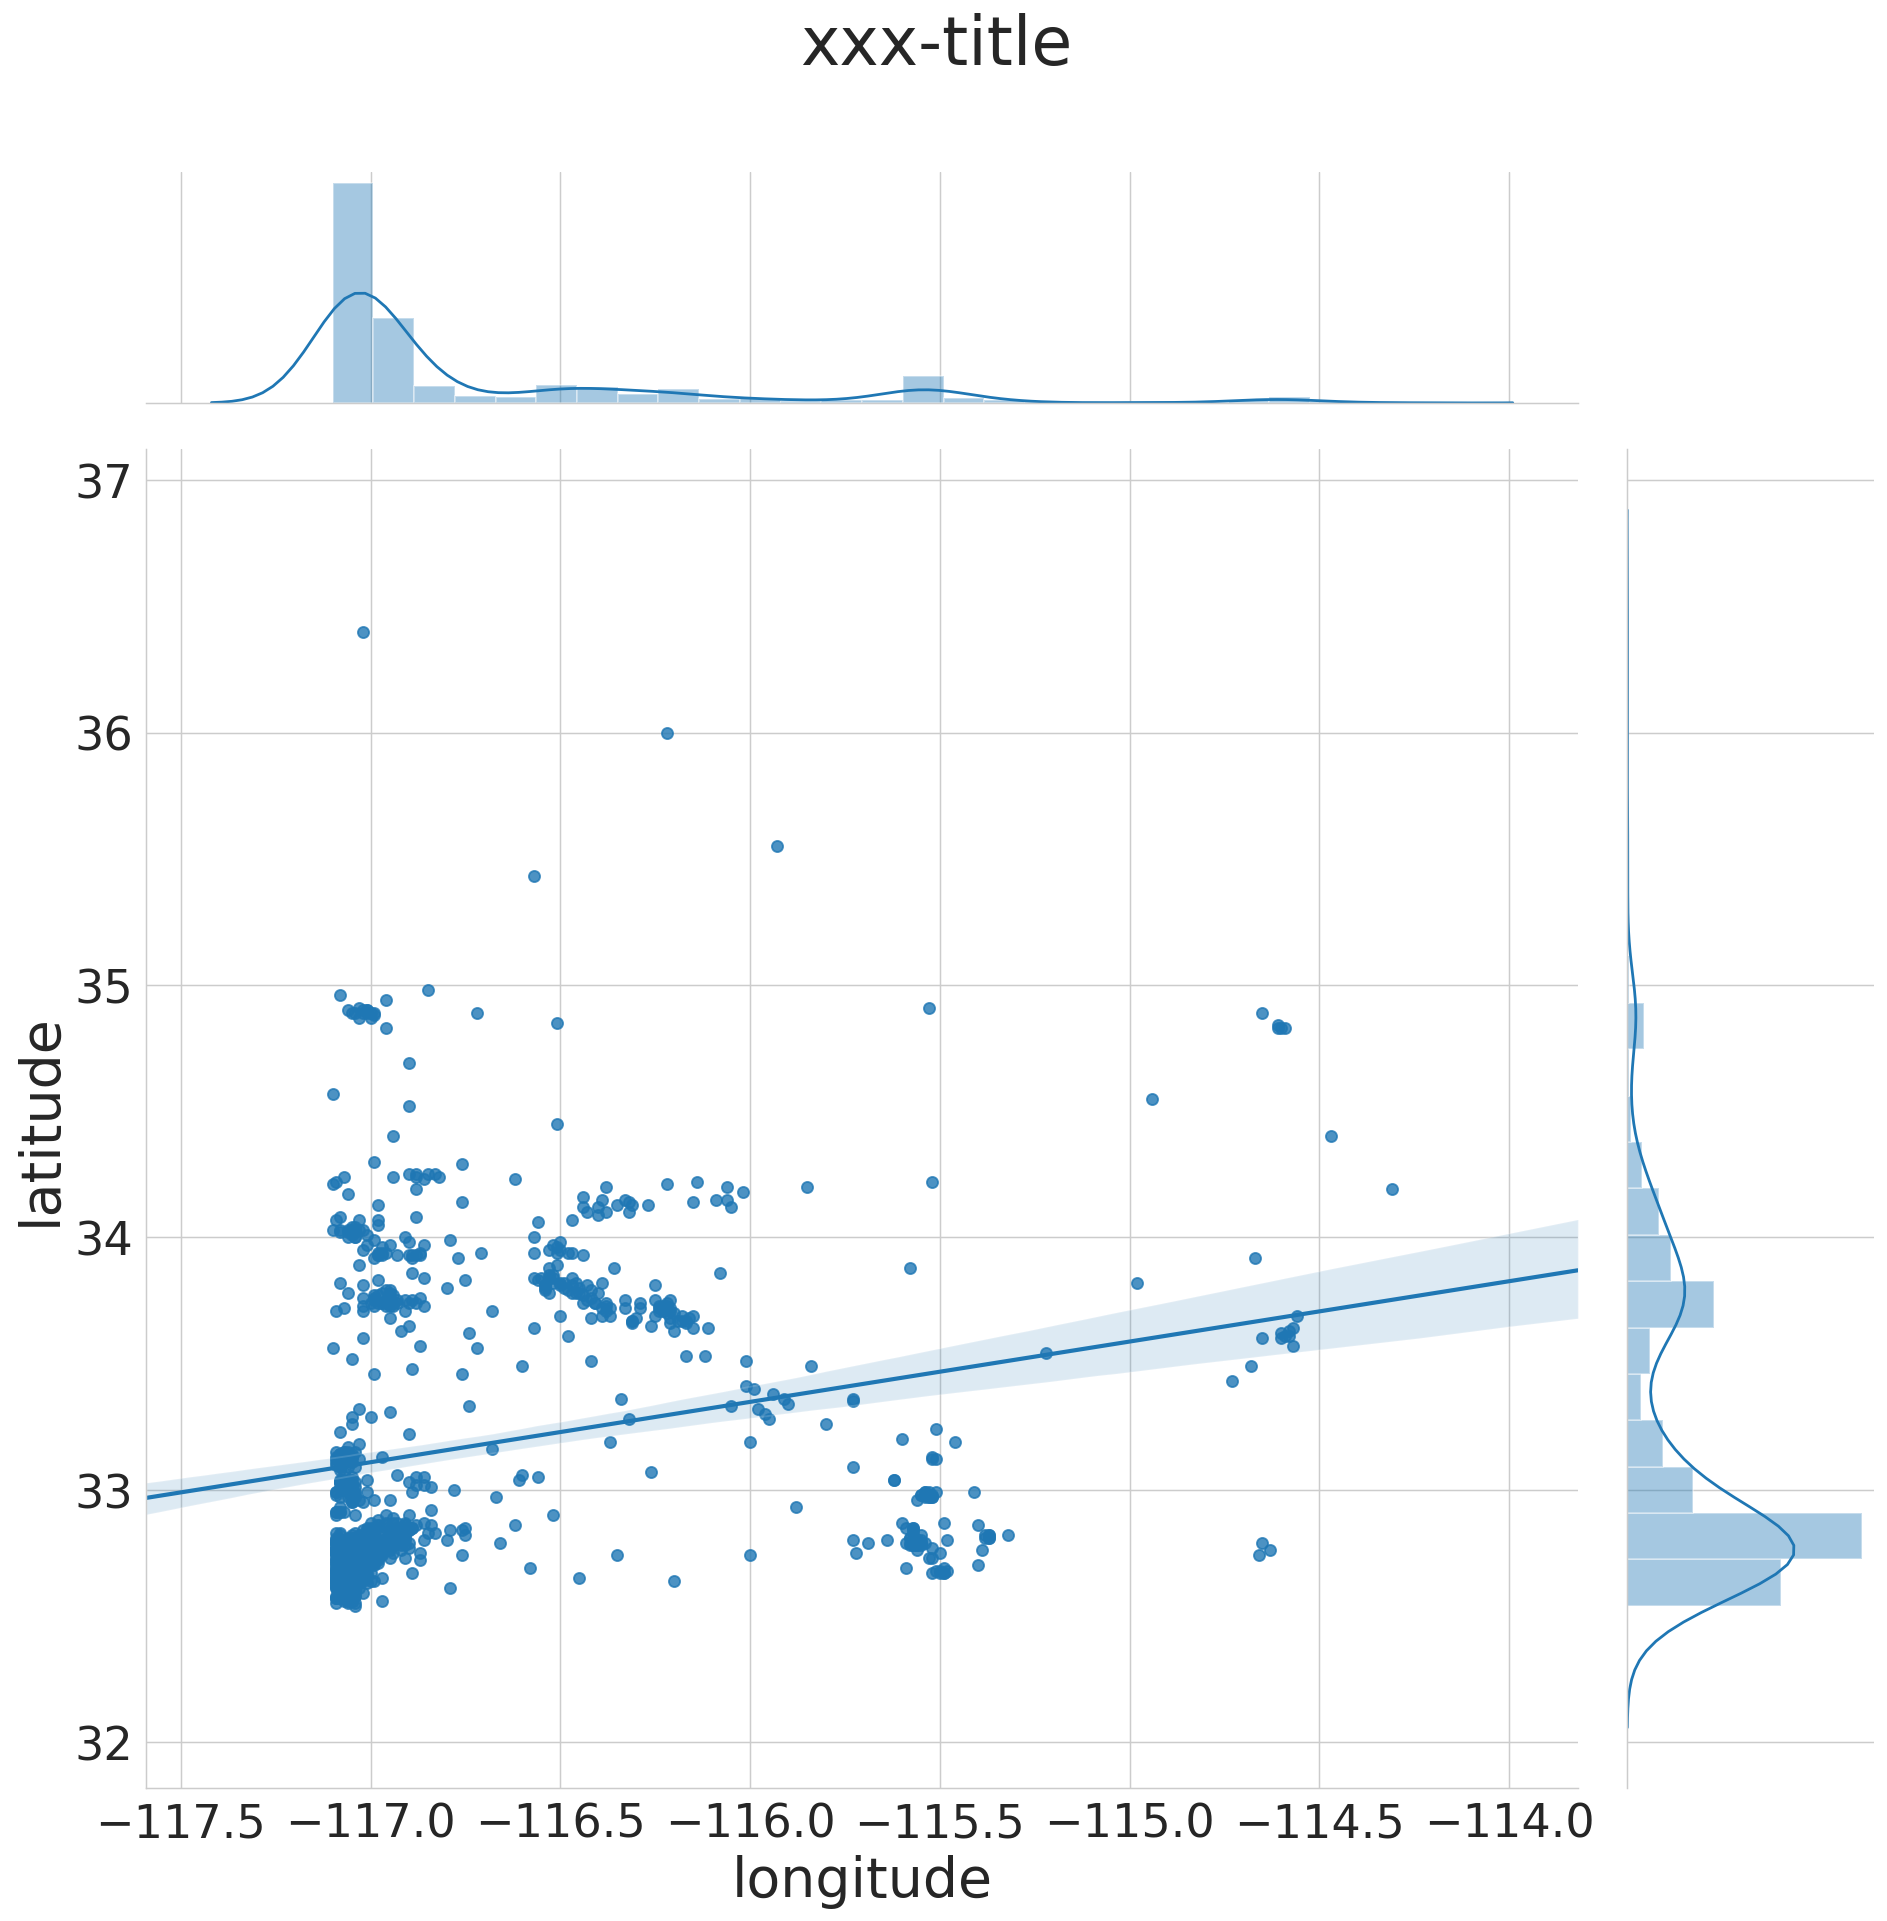

In [8]:
plot(sns.jointplot(x = "longitude", y = "latitude", data=df, kind="reg", truncate=False, height=size_inch)  # figureレベル関数の場合はheightを明示のこと。
  , tl="xxx-title")

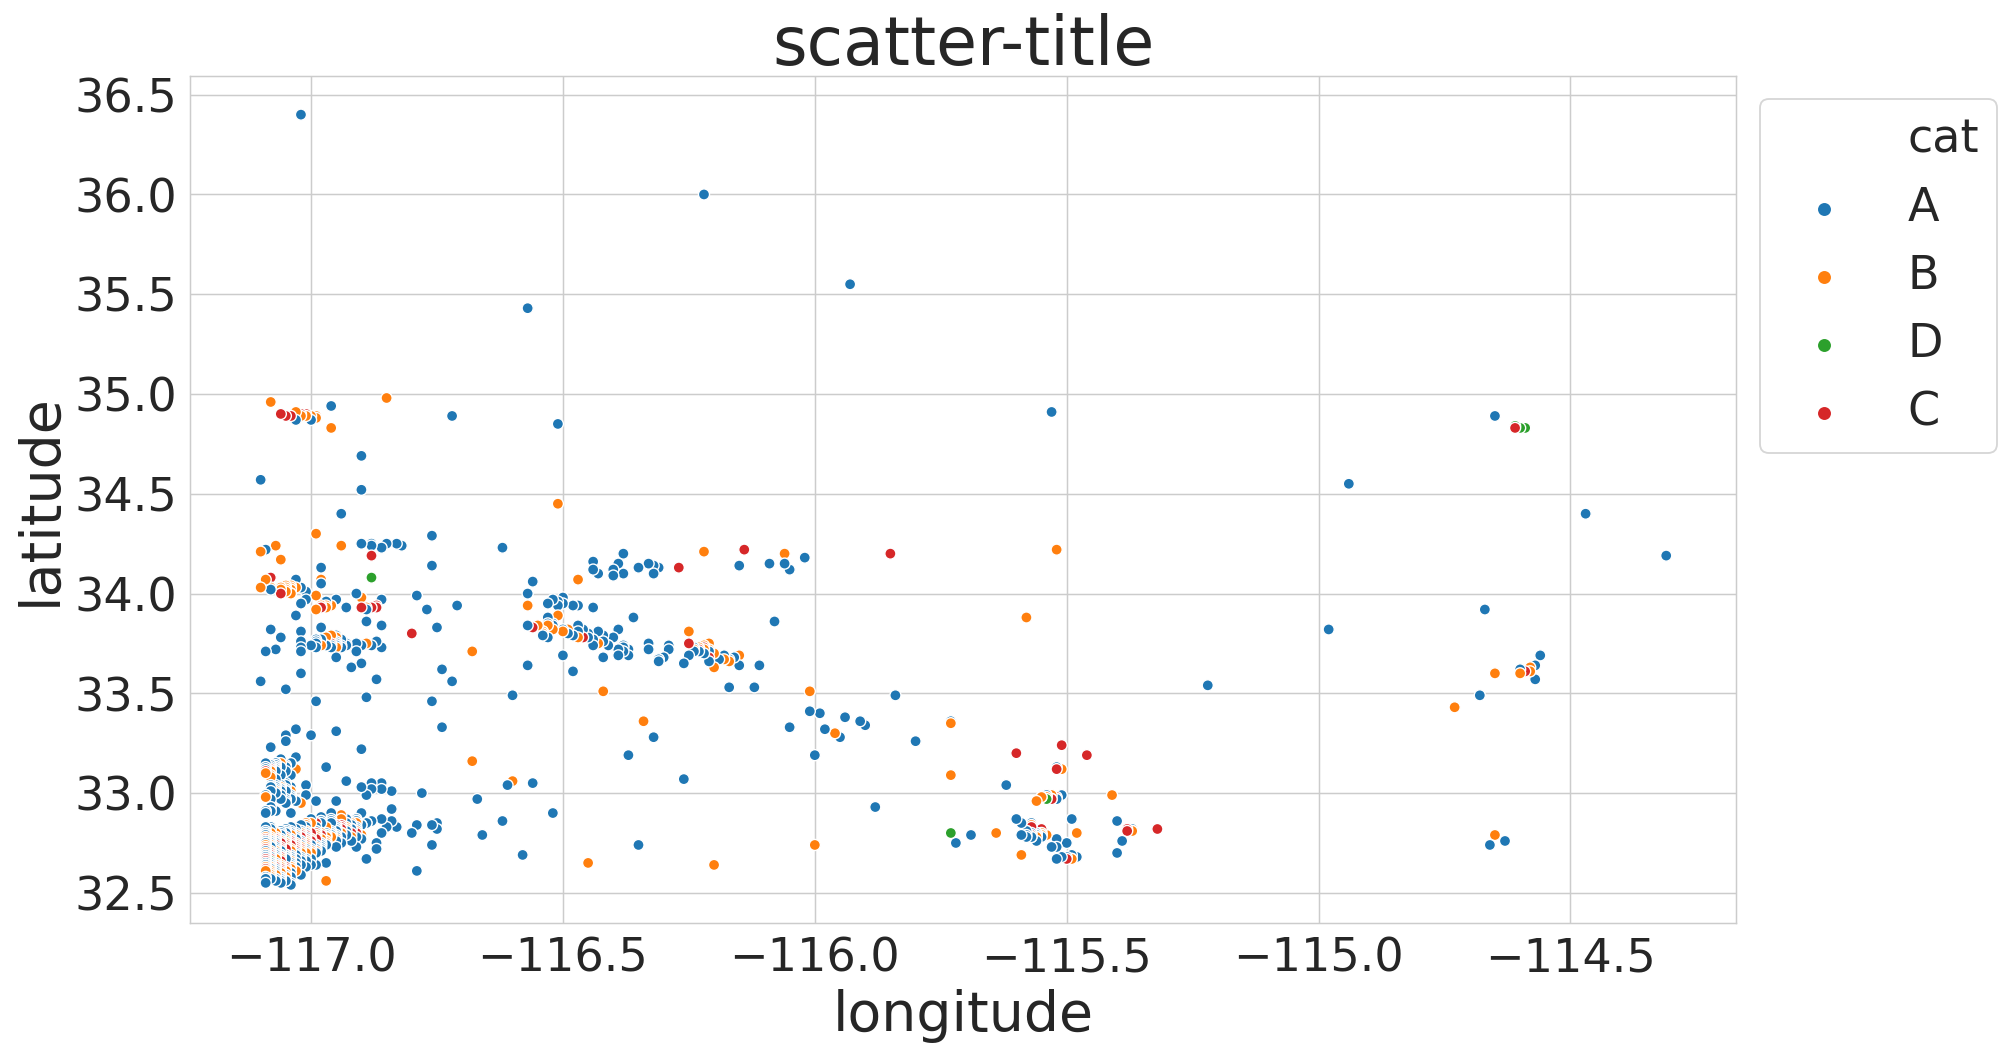

In [9]:
plot(sns.scatterplot(data=df, x="longitude", y="latitude", hue="cat")  # axesレベル関数
  , tl="scatter-title"
  , ld_out=True
  )

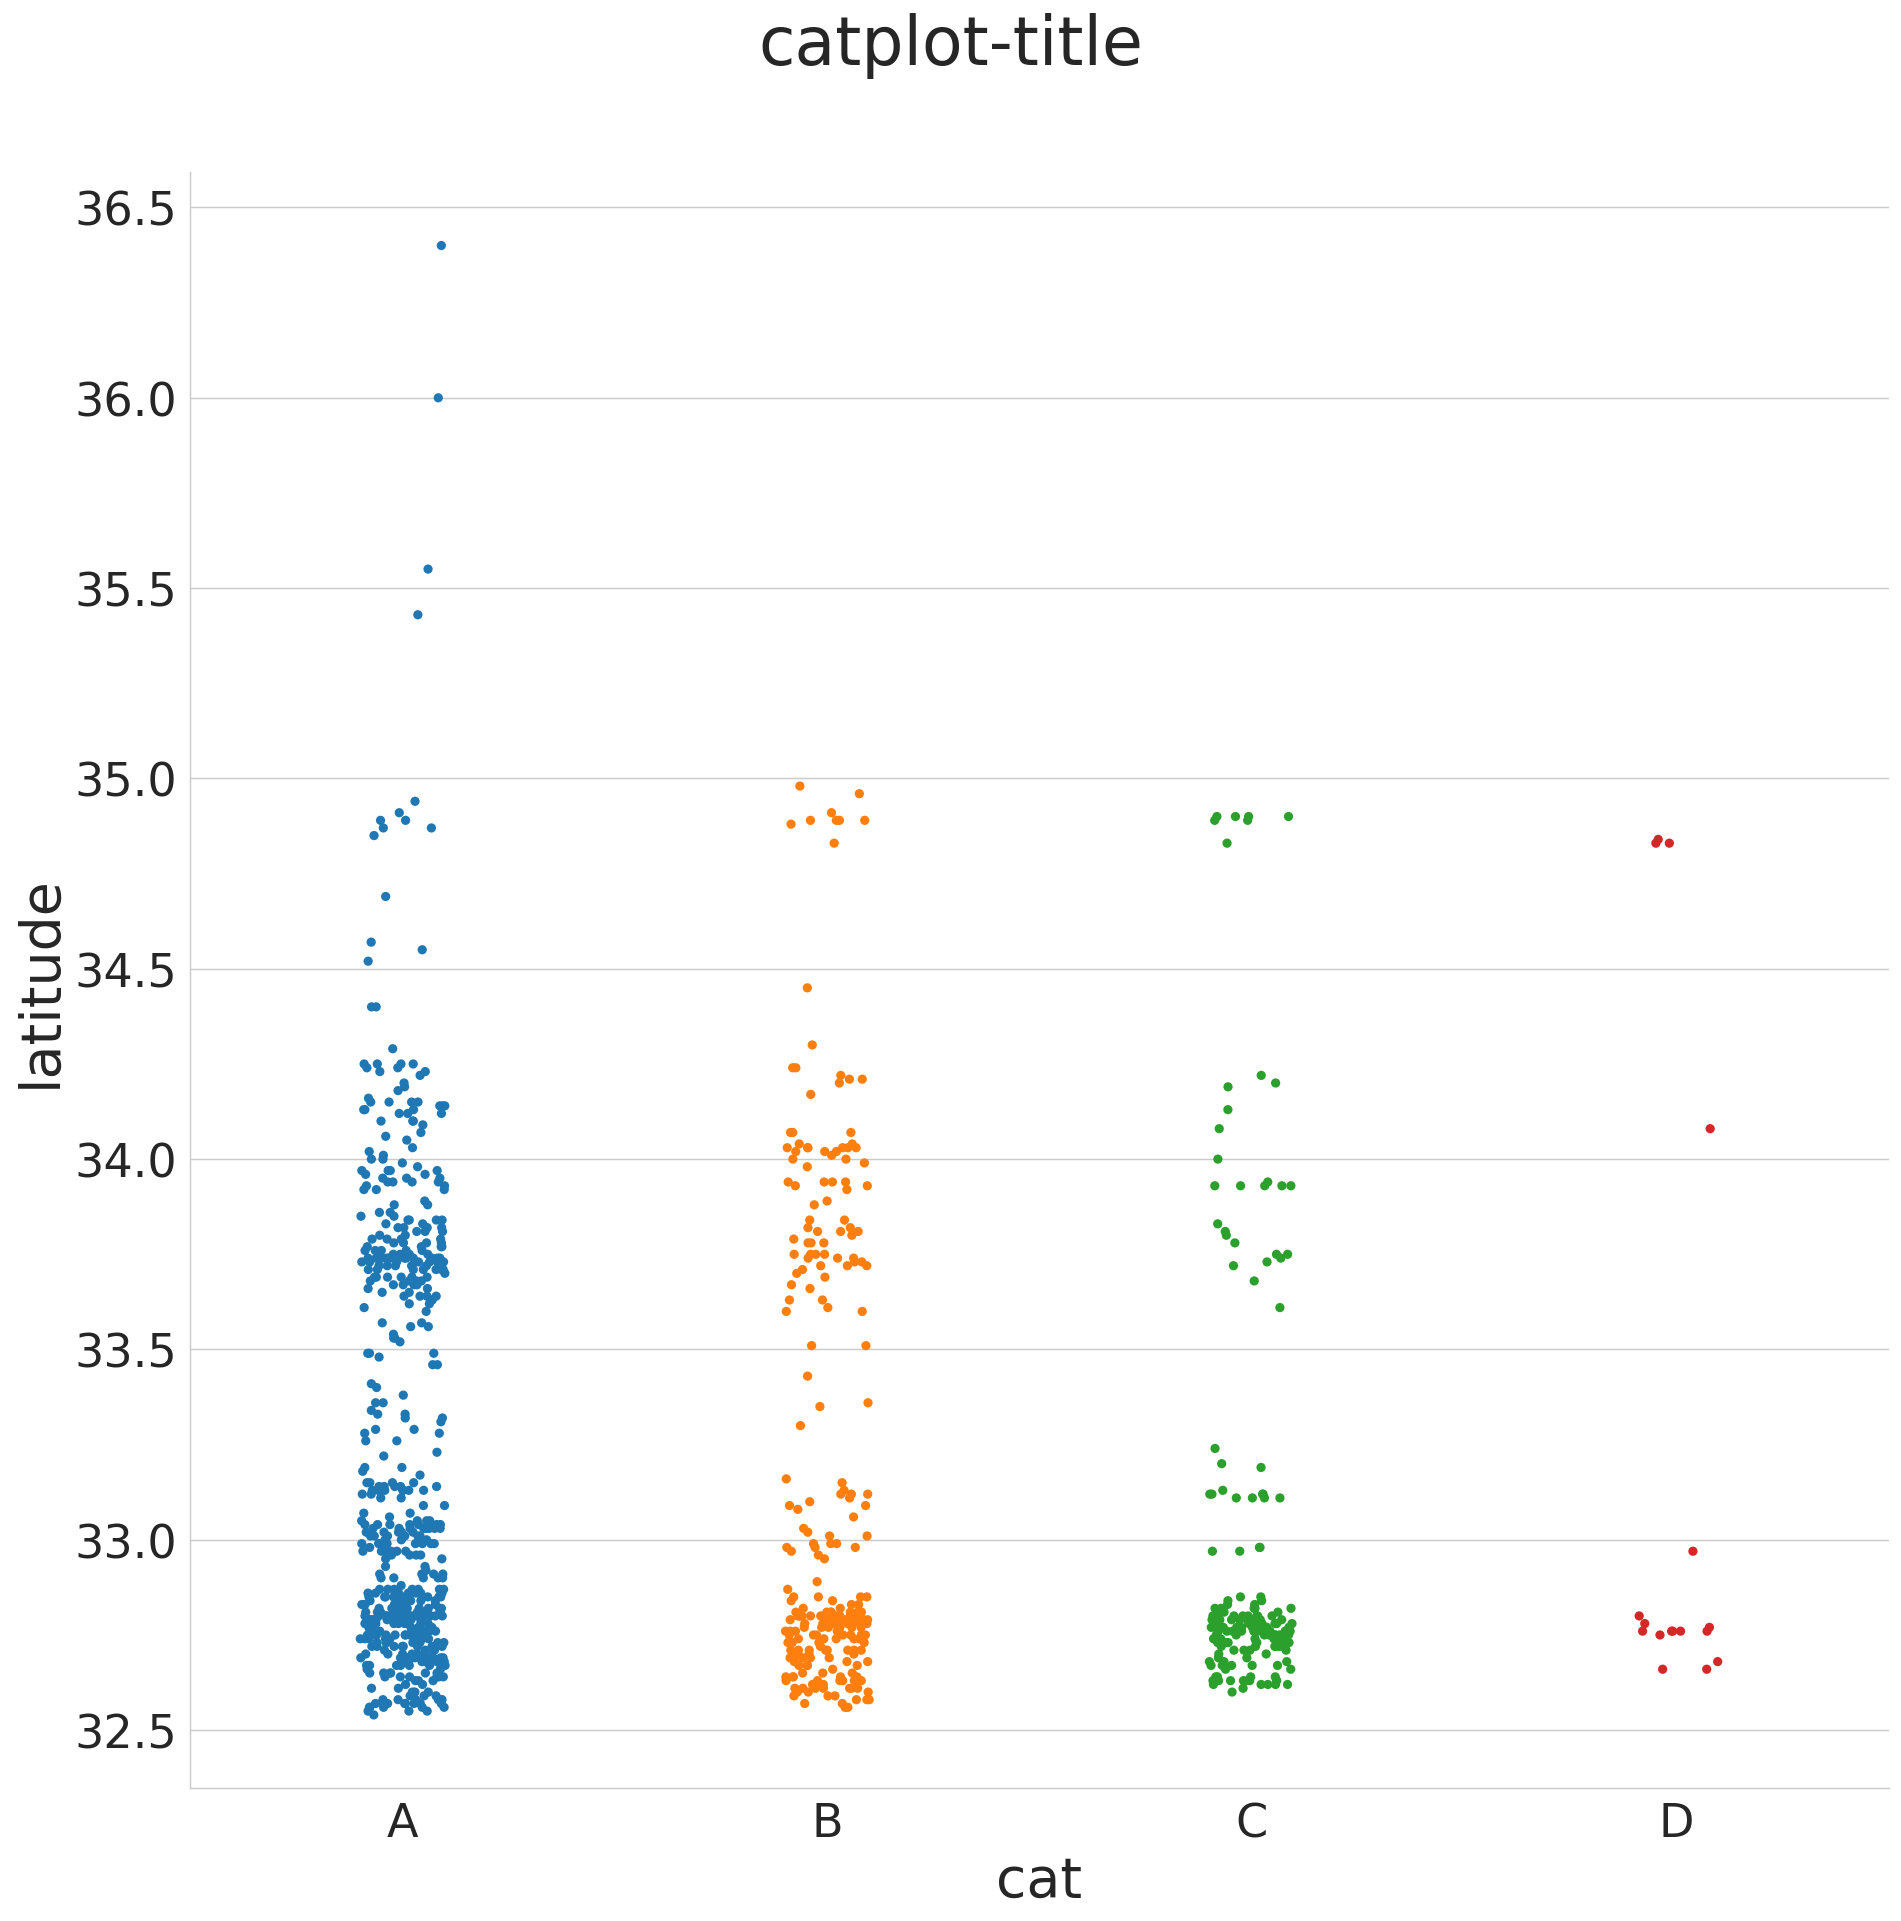

In [10]:
plot(sns.catplot(data=df, x="cat", y="latitude", height=size_inch)
  , tl="catplot-title")

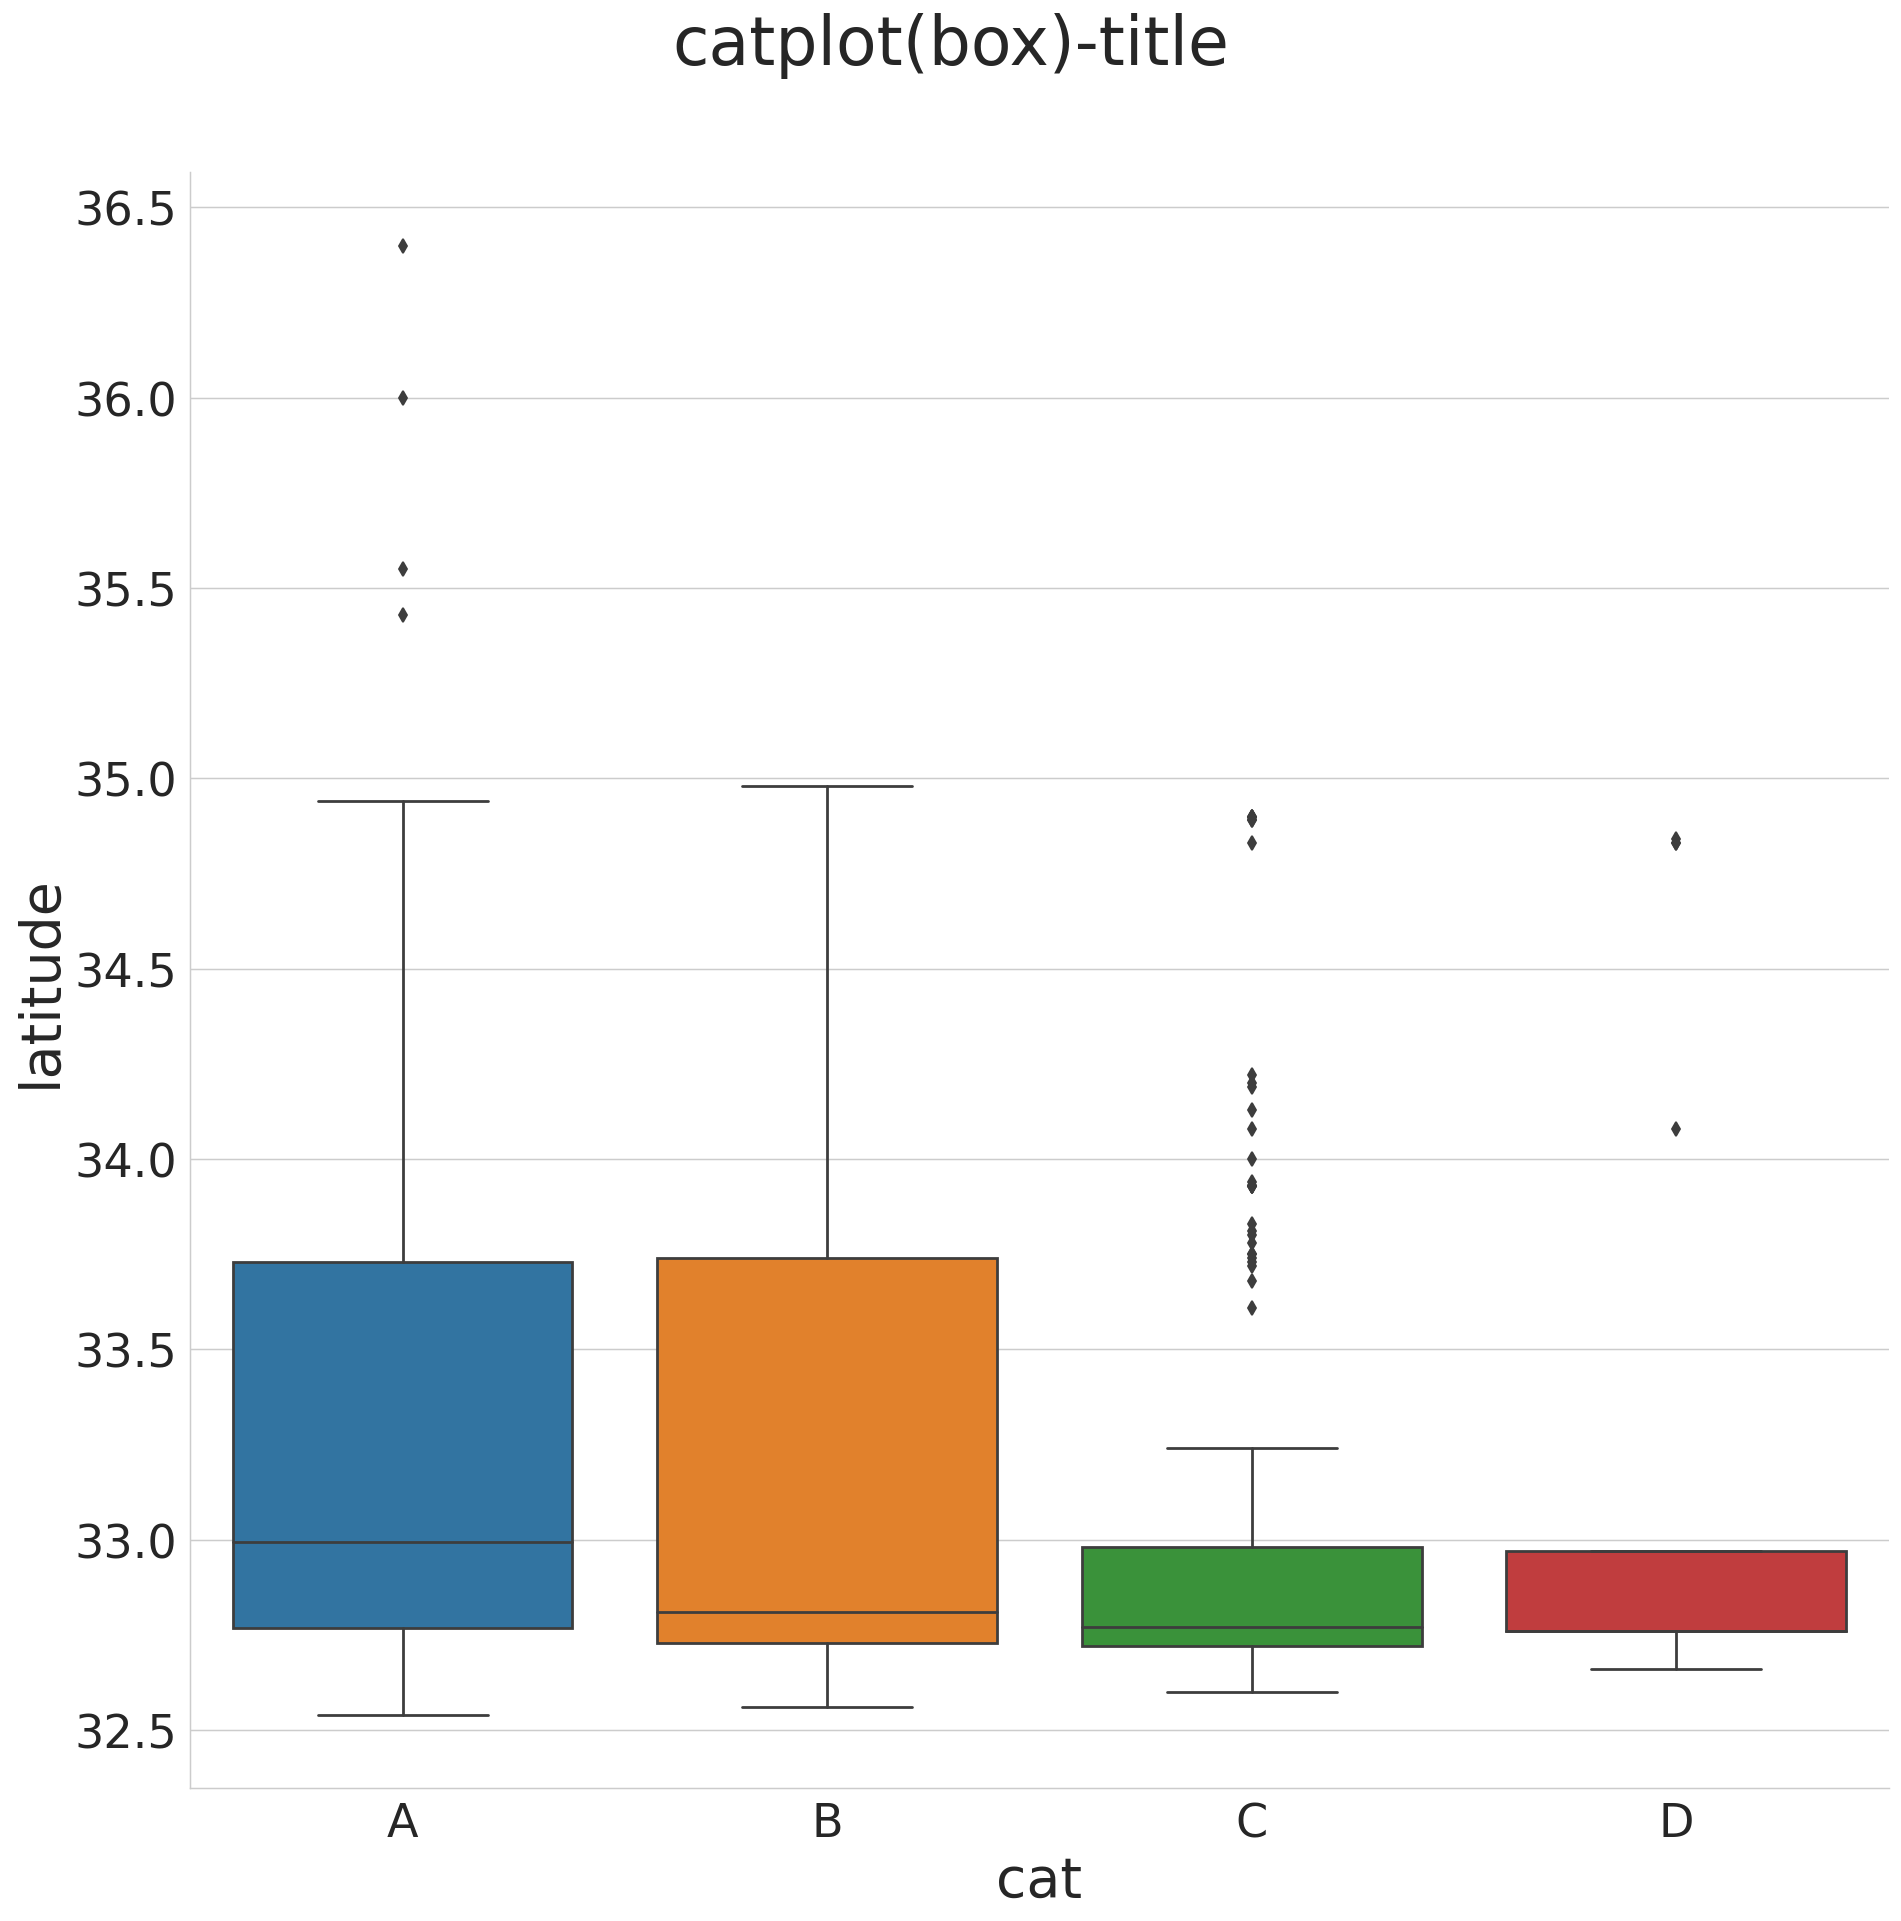

In [11]:
plot(sns.catplot(data=df, x="cat", y="latitude", kind="box", height=size_inch)
  , tl="catplot(box)-title")

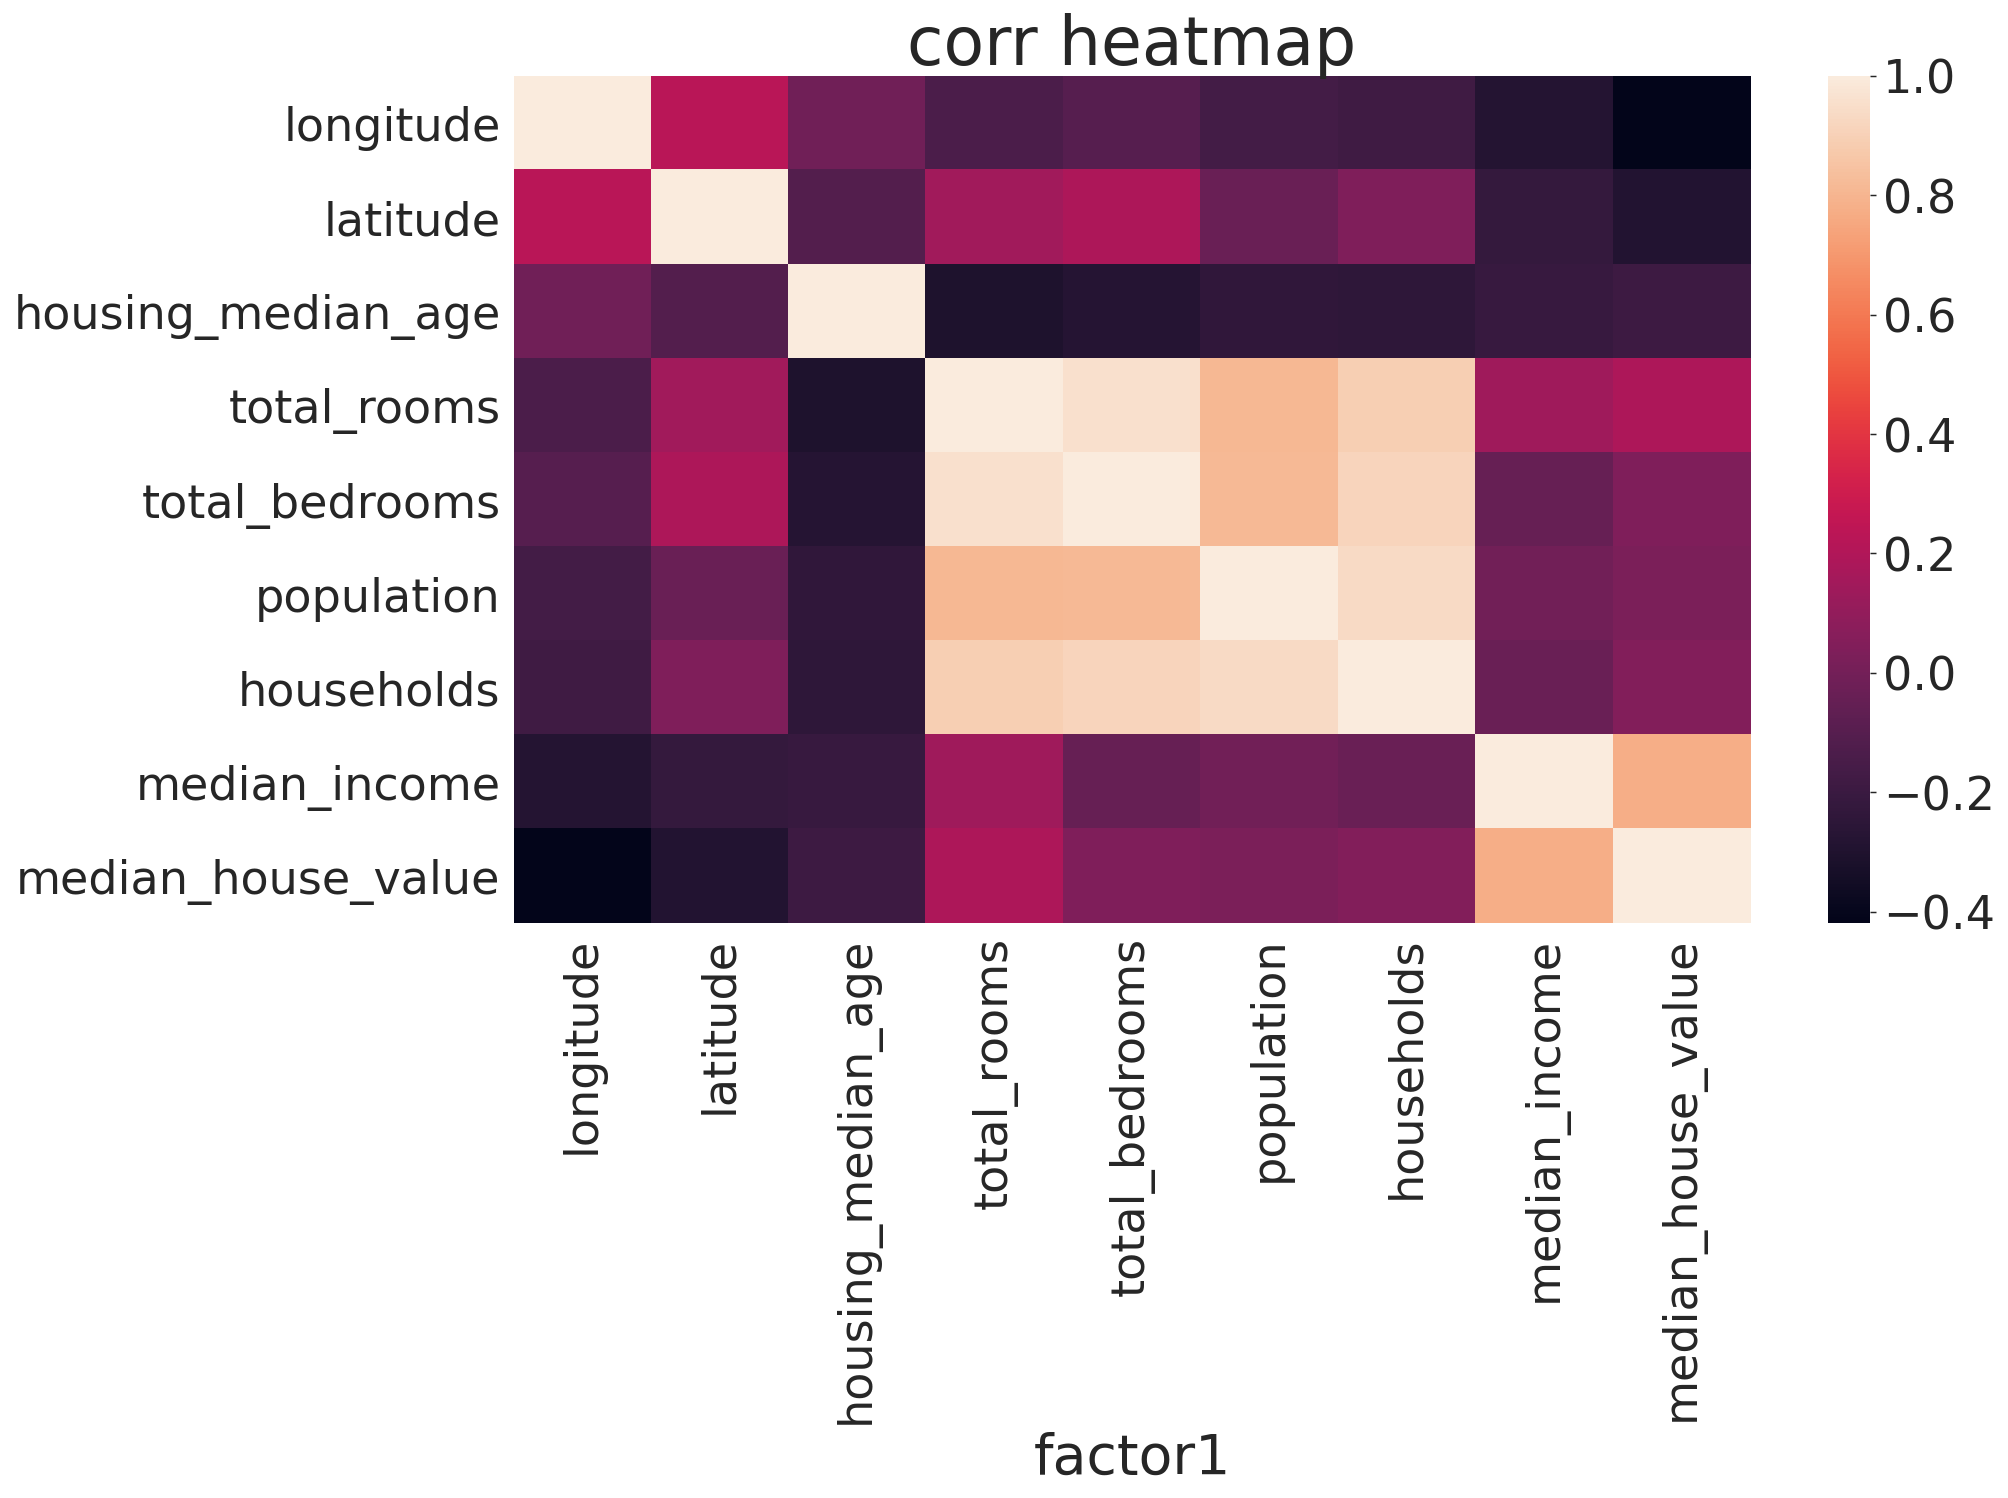

In [12]:
plot(sns.heatmap(df.corr())  # axesレベル関数はheightなし
  ,xl="factor1", tl="corr heatmap")

# Pandas

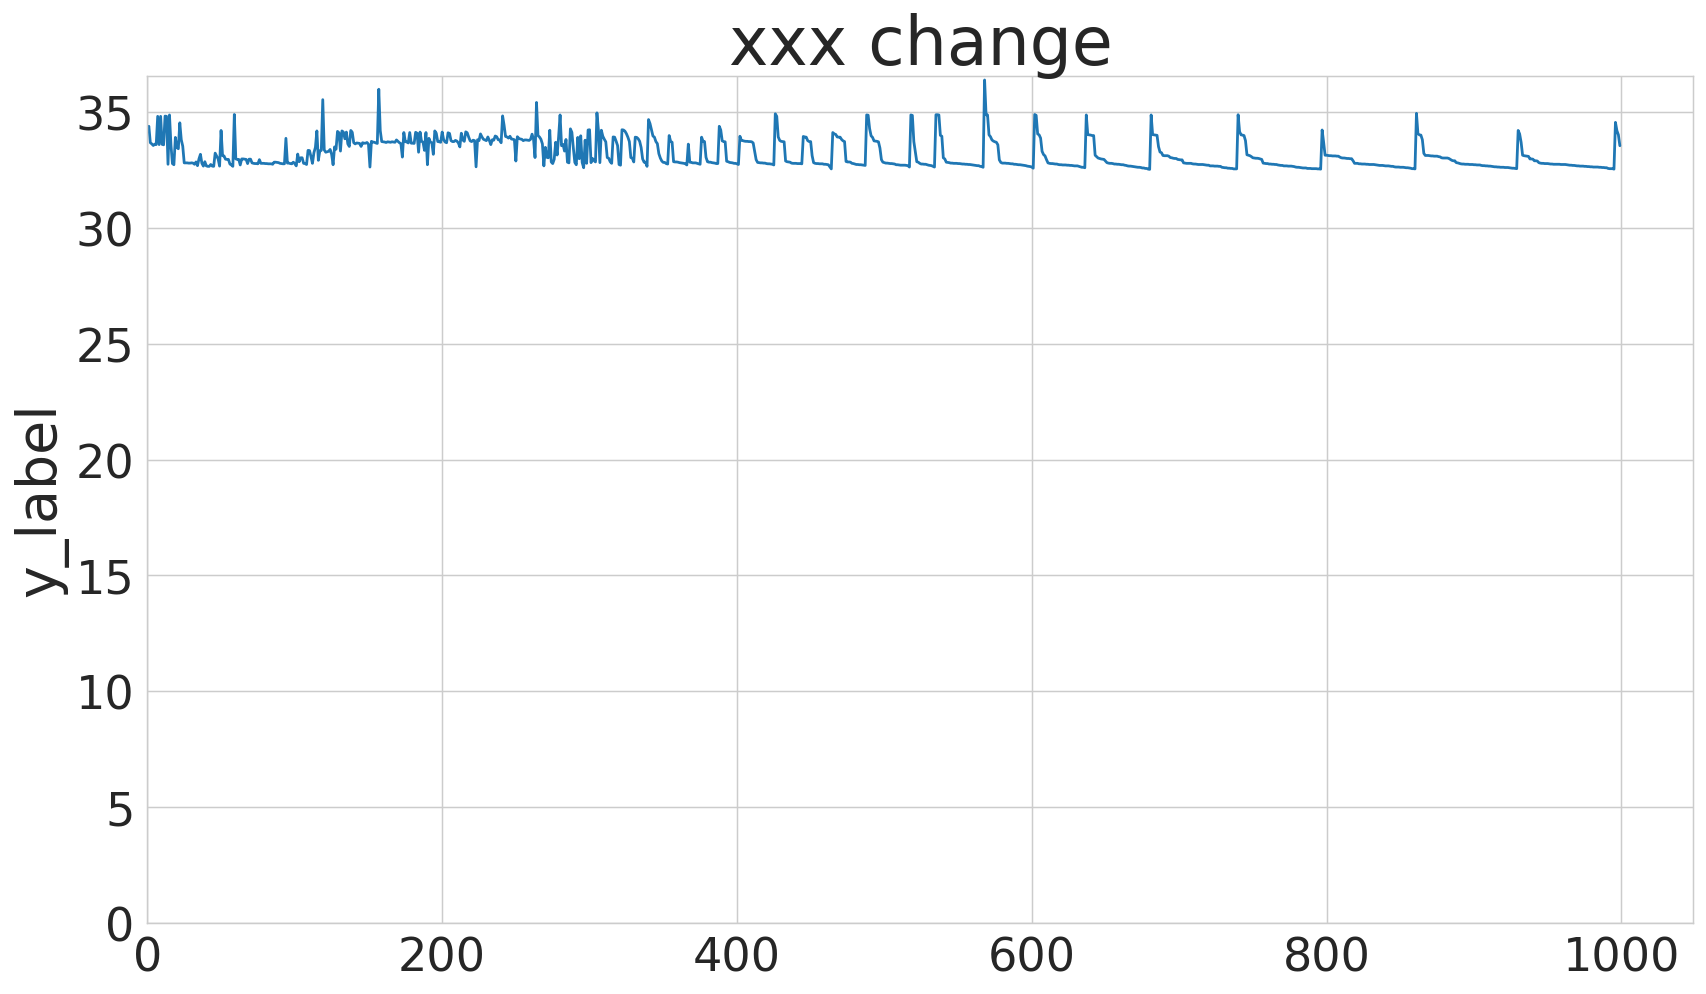

In [25]:
plot(df.plot(y = "latitude", legend=False
        ,xlim=(0,None), ylim=(0,None)
    )
    ,tl = "xxx change", xl="", yl="y_label"
    )

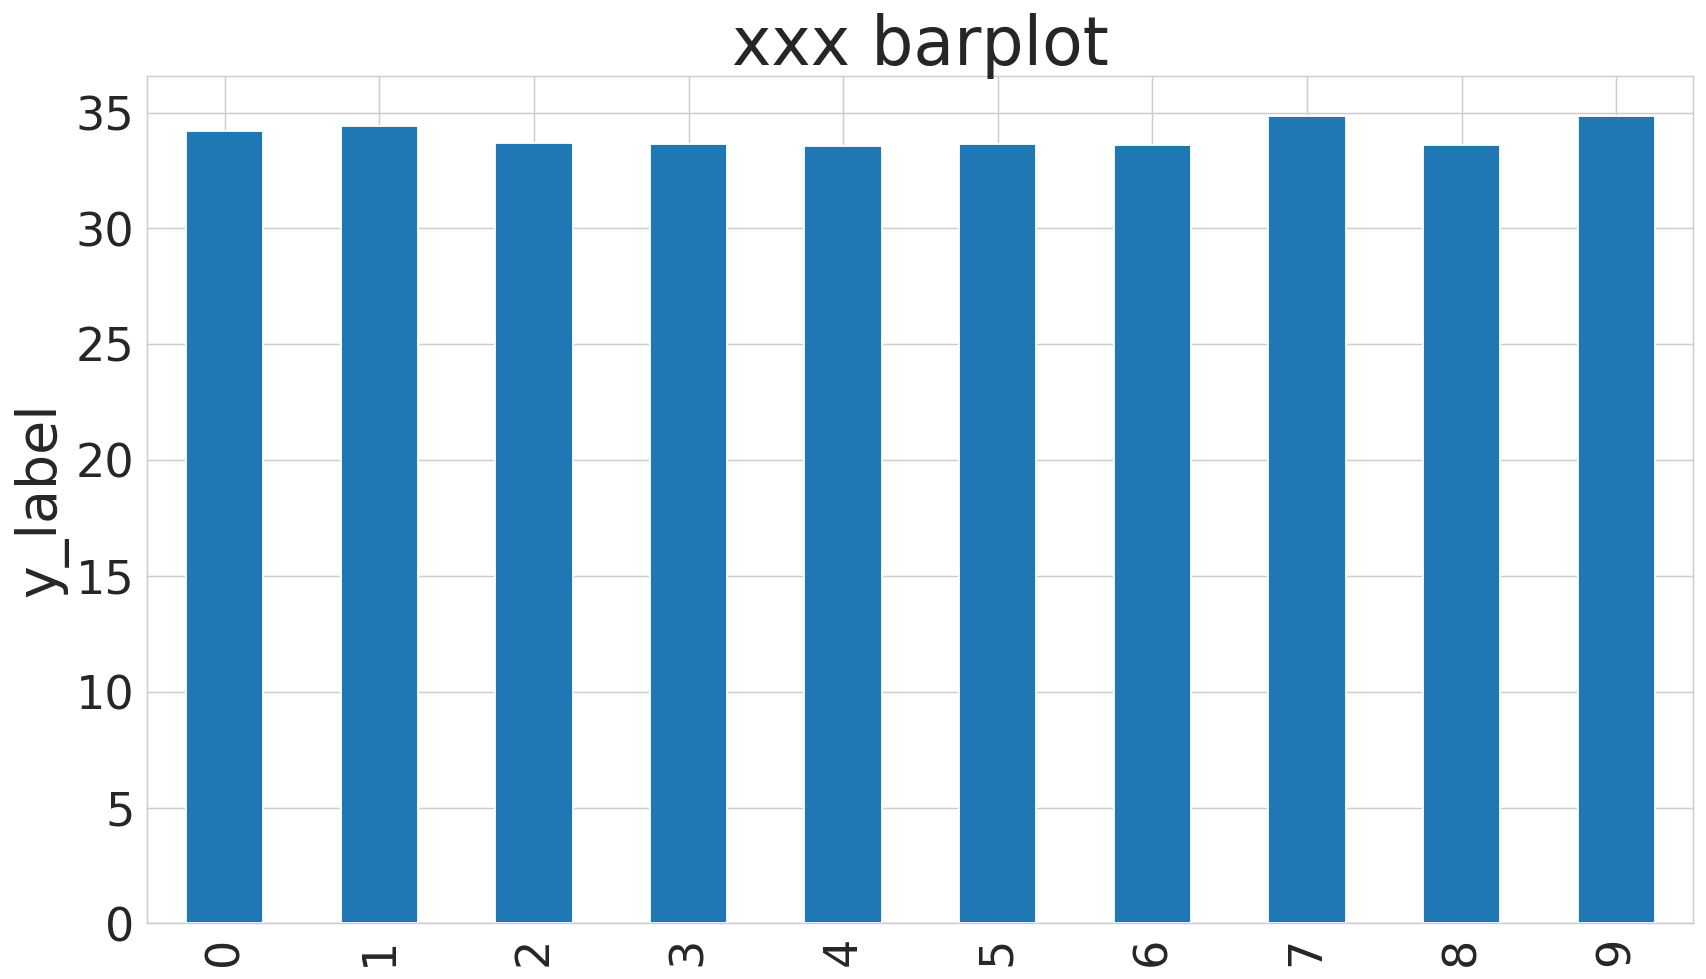

In [26]:
plot(df.iloc[0:10].plot.bar(y = "latitude", legend=False
        ,xlim=(0,None), ylim=(0,None)
    )
    ,tl = "xxx barplot", xl="", yl="y_label"
    )

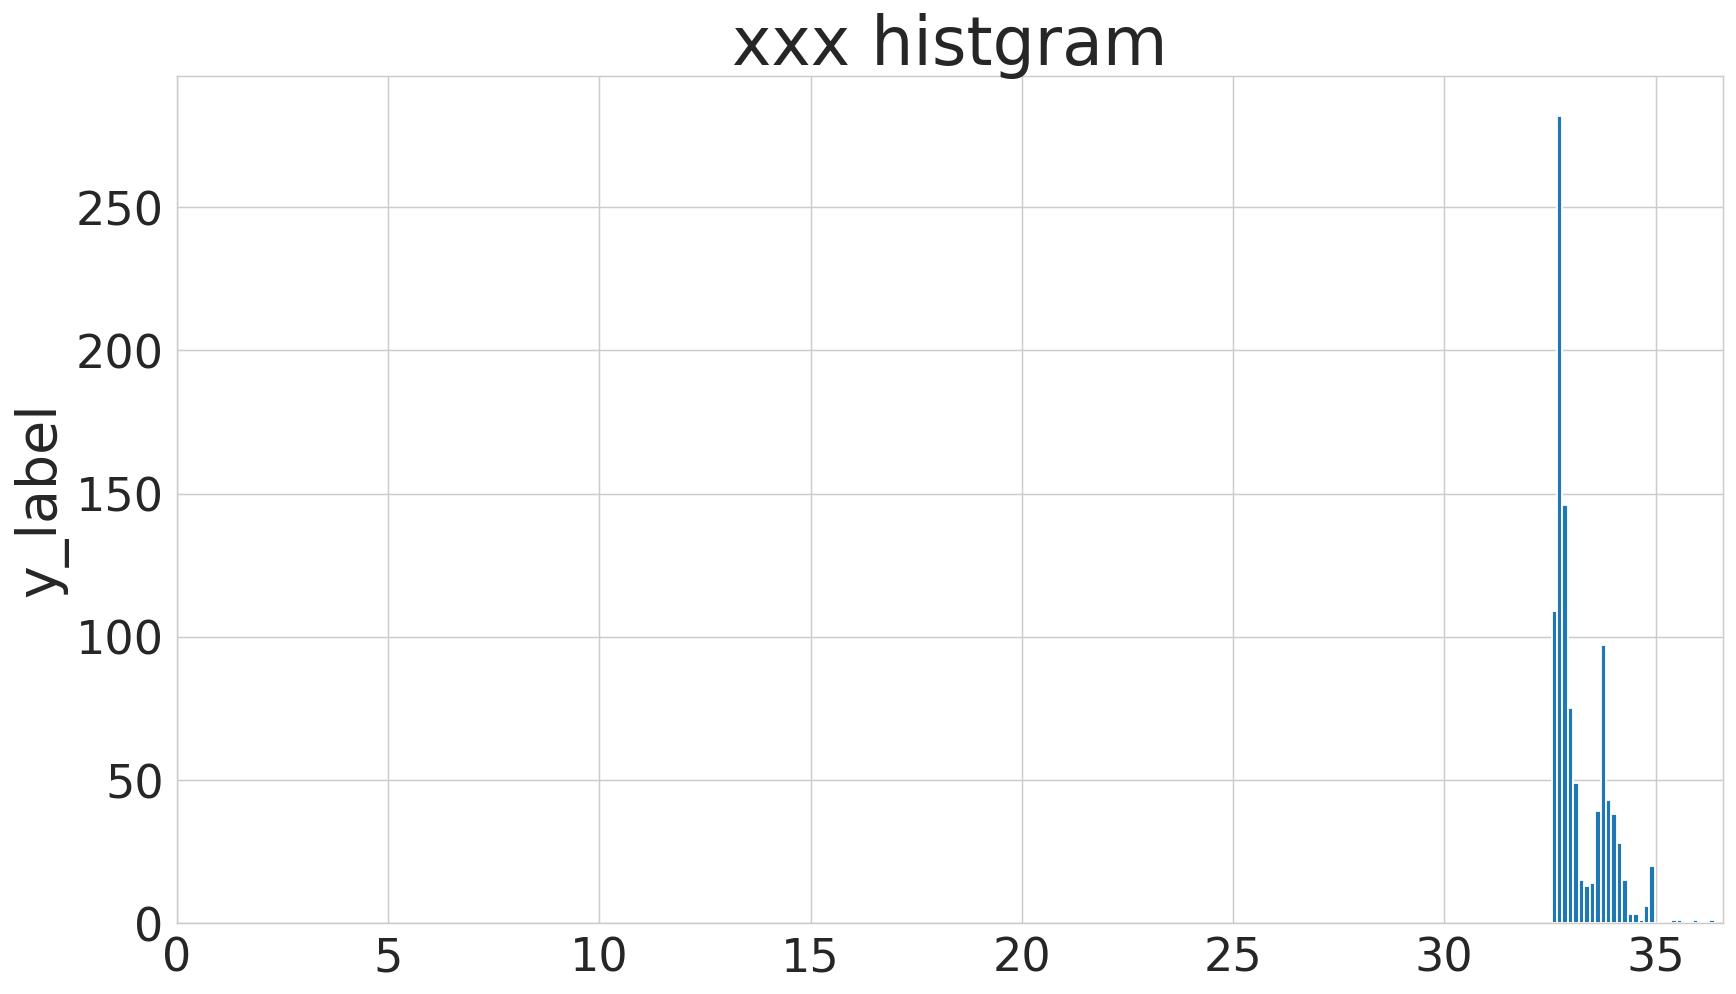

In [27]:
plot(df.plot.hist(y = "latitude", bins=30, legend=False
          ,xlim=(0,None), ylim=(0,None)
     )
     ,tl = "xxx histgram", xl="", yl="y_label"
     )

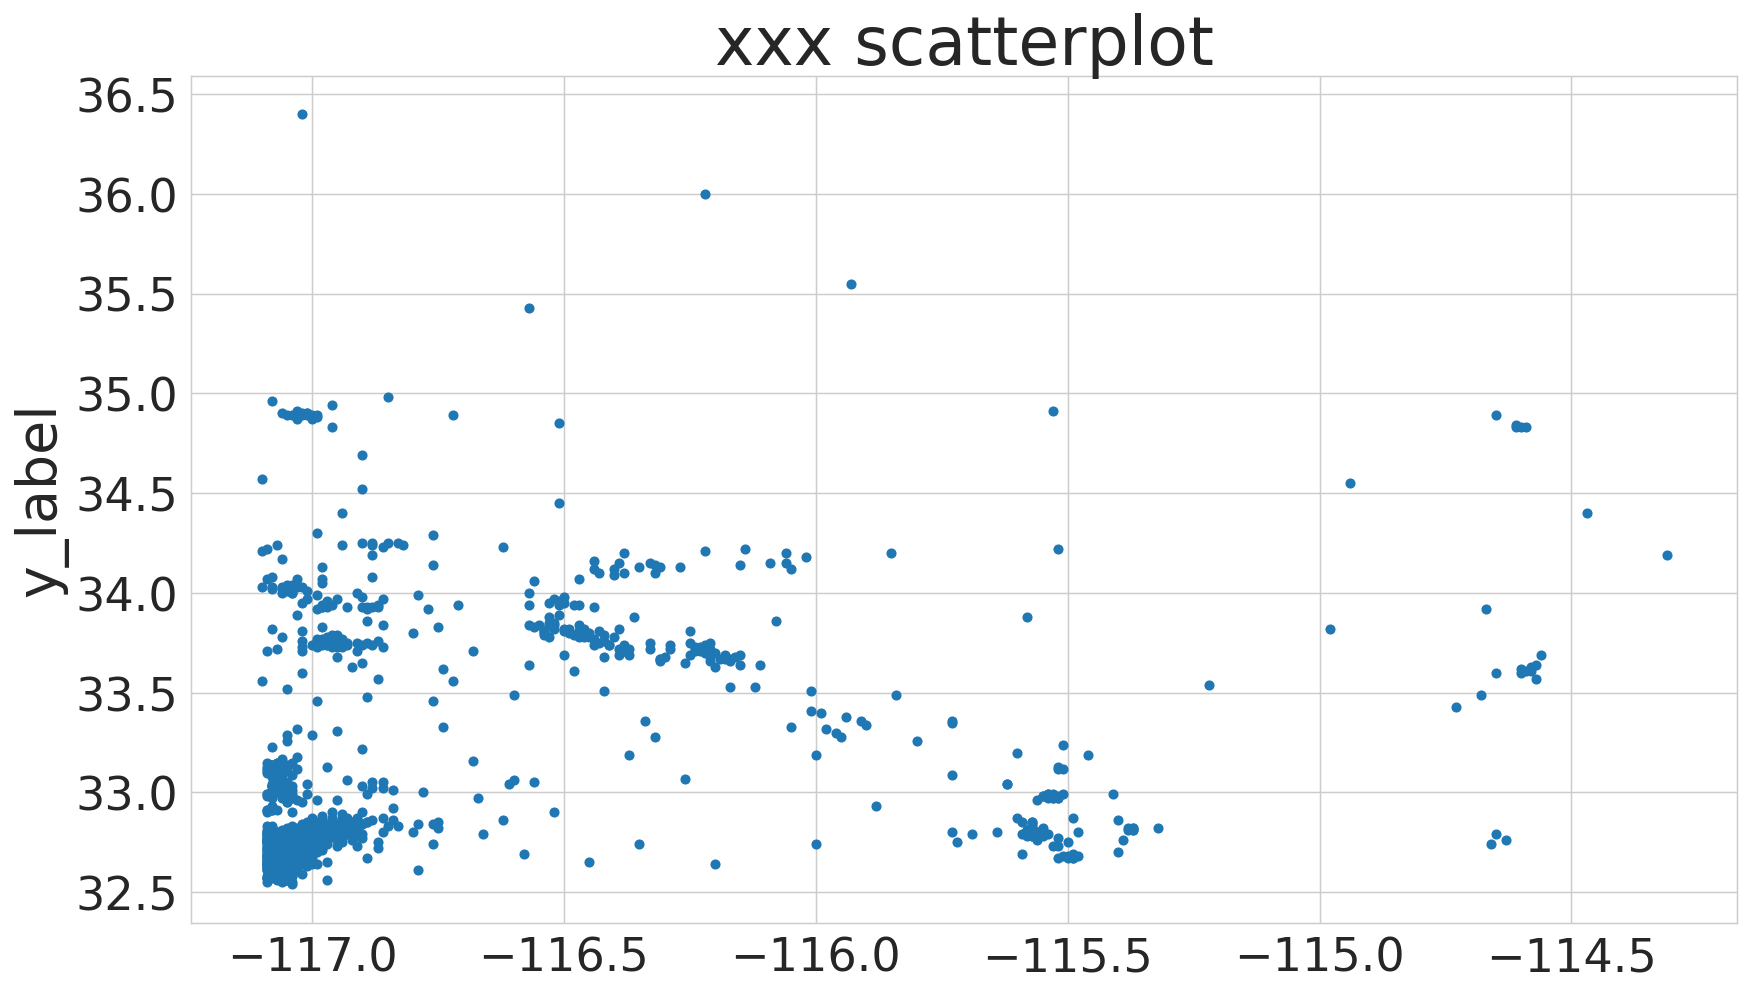

In [28]:
plot(df.plot.scatter(x="longitude", y = "latitude", legend=False
        #  ,xlim=(0,None), ylim=(0,None)
    )
    ,tl = "xxx scatterplot", xl="", yl="y_label"
    )

# NGパターン

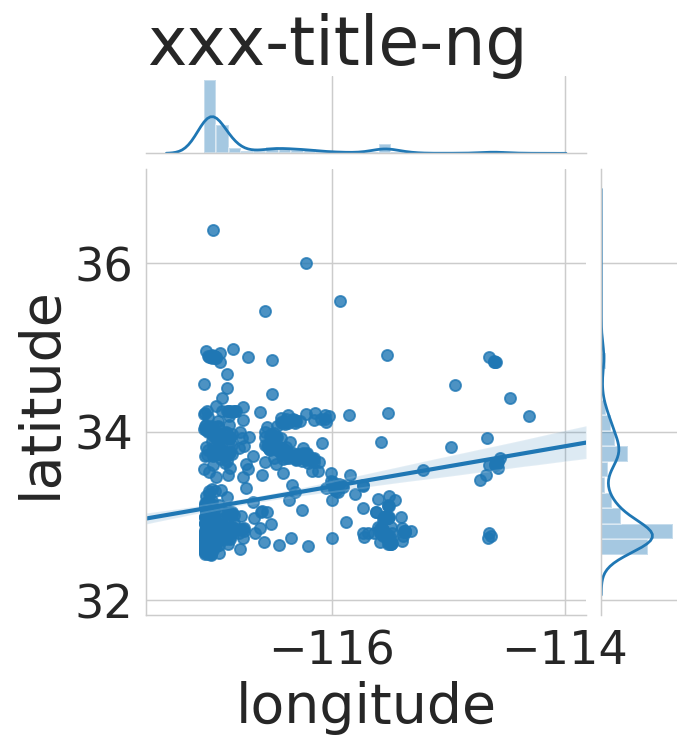

In [18]:
# , height=15  指定なし。　ラベルが大きすぎ。
plot(sns.jointplot(x = "longitude", y = "latitude", data=df, kind="reg", truncate=False)
  , tl="xxx-title-ng")